## This project is created to learn more about the mushroom kingdom and find interesting dependencies between colors, shapes, and forms.

In [108]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
import time
from sklearn.model_selection import StratifiedKFold

## Read dataset

In [109]:
df = pd.read_csv('./mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


## Get general info about the Dataframe

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Check for empty cells

In [111]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## DataFrame contains edible and poisonous mushrooms 
## the distribution is almost equal
## classes : edible=e, poisonous=p

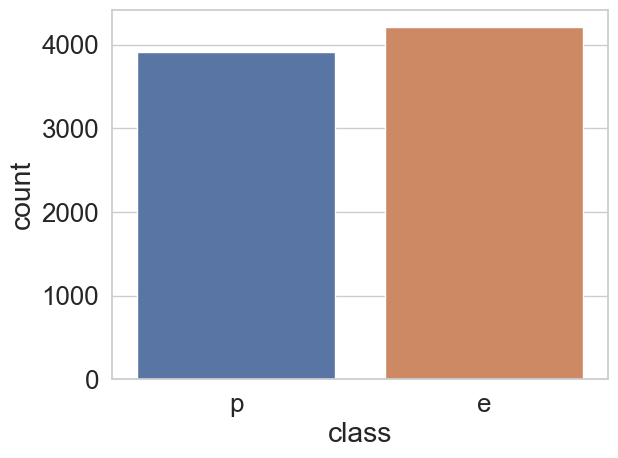

In [112]:
classes = sns.countplot(x = "class", data = df)
plt.show()

## Change the object type -> int type 
## Using LabelEncoder()

In [113]:
mush = pd.DataFrame()

for col in df.columns:
    mush[col] = LabelEncoder().fit_transform(df[col])

mush.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


## Analyze how the presence of damage on a mushroom affects its edibility
## It can be observed that a mushroom without bruises is more likely to be poisonous
## A mushroom with bruises is more likely to be edible

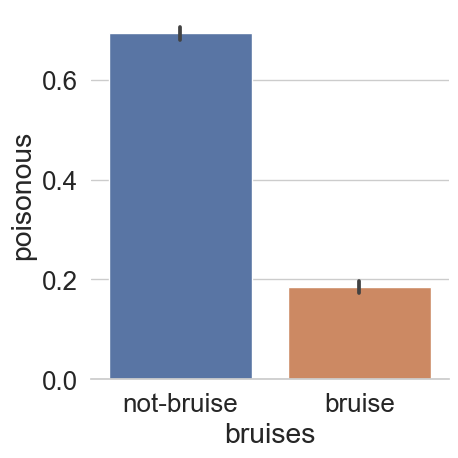

In [114]:
bruises = sns.catplot(x="bruises",y="class",data=mush, kind="bar", height = 5)
bruises.despine(left=True)
bruises.set(xticks=range(0,2), xticklabels=["not-bruise","bruise"])
bruises = bruises.set_ylabels("poisonous")

## Let's analyze the color of the mushroom under the cap (gills)
## All colors are presented in a pie chart

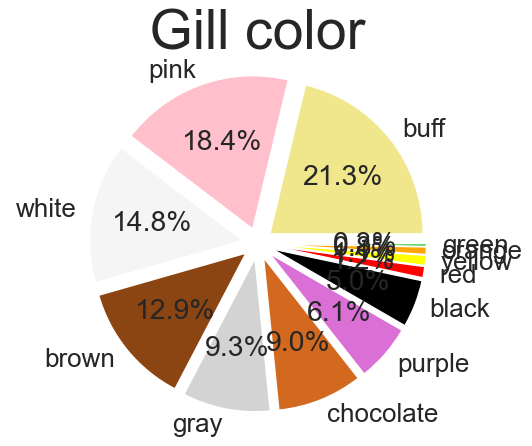

In [115]:
countGill = df['gill-color'].value_counts(sort = True)
labels    = ["buff","pink","white","brown","gray","chocolate","purple","black","red","yellow","orange","green"]
colors    = ["khaki","pink","whitesmoke","saddlebrown","lightgrey","chocolate","orchid","black","red","yellow","orange","limegreen"]

plt.pie(countGill, explode=(.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1), labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.figtext(.5,0.9,' Gill color',fontsize=40,ha='center')
plt.show()

## Let's analyze the color under the mushroom cap
## The relationship between color and mushroom edibility is presented as a histogram

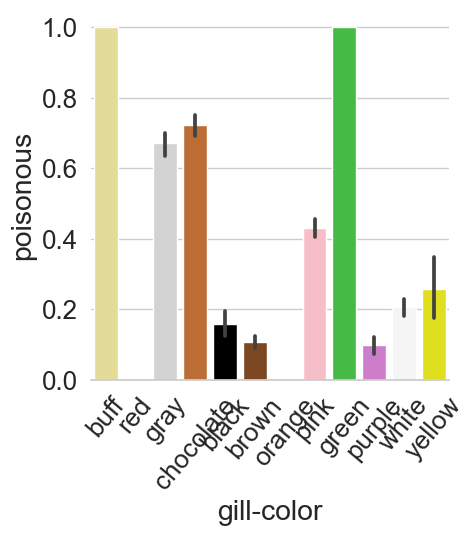

In [116]:
gillcolor = ["khaki","Red","lightGrey","chocolate","Black","saddleBrown","orange","lightpink","limegreen","orchid","whitesmoke","Yellow"]
gillname  = ["buff","red","gray","chocolate","black","brown","orange","pink","green","purple","white","yellow"]

gills = sns.catplot(x="gill-color",y="class",data=mush, kind="bar", height = 5 ,palette = gillcolor)
gills.despine(left=True)
gills.set_xticklabels(rotation=50)
gills.set( xticks=range(0,12), xticklabels=gillname )
gills = gills.set_ylabels("poisonous")

## We categorize all mushrooms based on surface damage
## Histogram of color distribution under the cap:

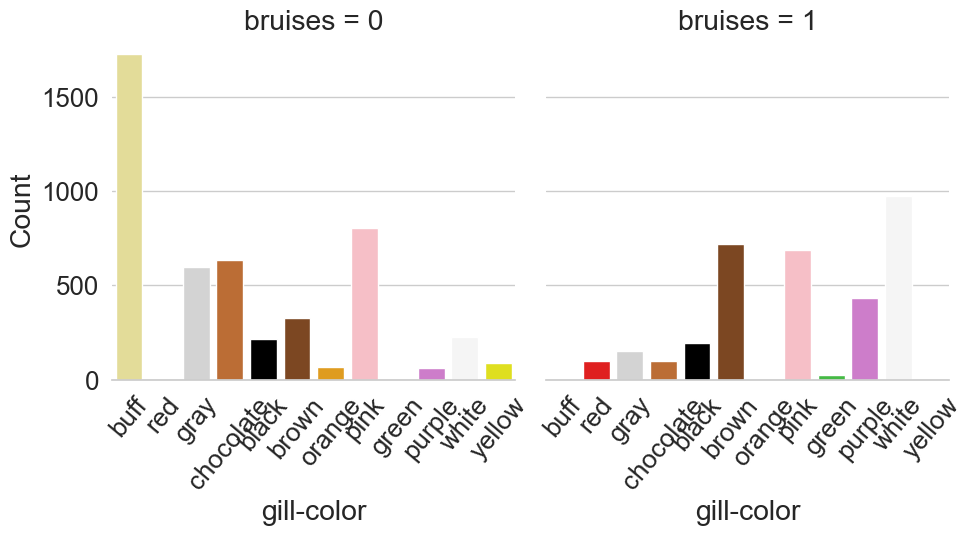

In [117]:
gills = sns.catplot(x = "gill-color", col="bruises",  data=mush, height=5, kind="count", palette =gillcolor)
gills.despine(left=True)

gills.set( xticks=range(0,12),xticklabels=gillname)
gills.set_xticklabels(rotation=50)
gills = gills.set_ylabels("Count")

## Histogram of mushroom toxicity distribution based on root type

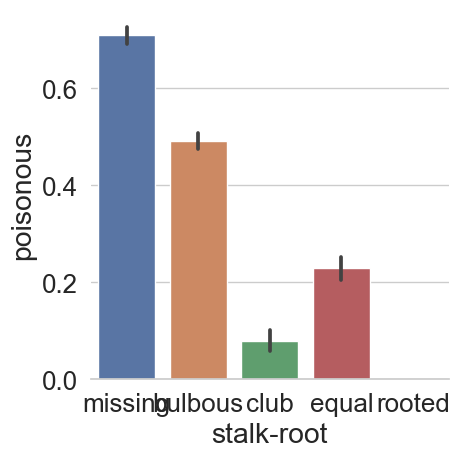

In [118]:
gills = sns.catplot(x="stalk-root",y="class",data=mush,kind="bar", height = 5 )
gills.despine(left=True)
gills.set(xticks=range(0,5), xticklabels=["missing","bulbous","club","equal","rooted"])
gills = gills.set_ylabels("poisonous")

## Histogram of mushroom toxicity distribution based on ring type

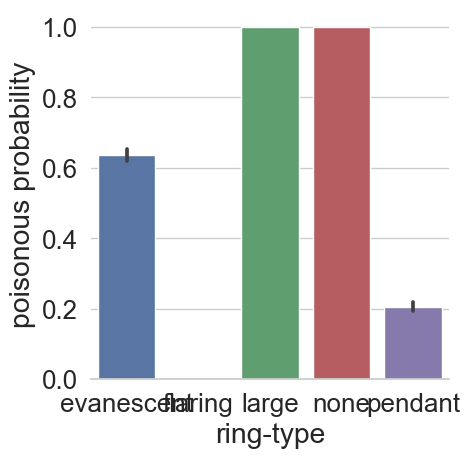

In [119]:
gills = sns.catplot(x="ring-type",y="class",data=mush,kind="bar", height = 5)
gills.despine(left=True)
gills.set(xticks=range(0,5), xticklabels=["evanescent","flaring","large","none","pendant"])
gills = gills.set_ylabels("poisonous probability")

## Remove the veil-type column because it's useless

In [120]:
countVeilT = mush['veil-type'].value_counts()
print('All values: ' ,countVeilT/mush['class'].count(), )
mush = mush.drop(['veil-type'],axis=1)

All values:  veil-type
0    1.0
Name: count, dtype: float64


## For easy visualization of parameter correlation 
## Creating a heat map 

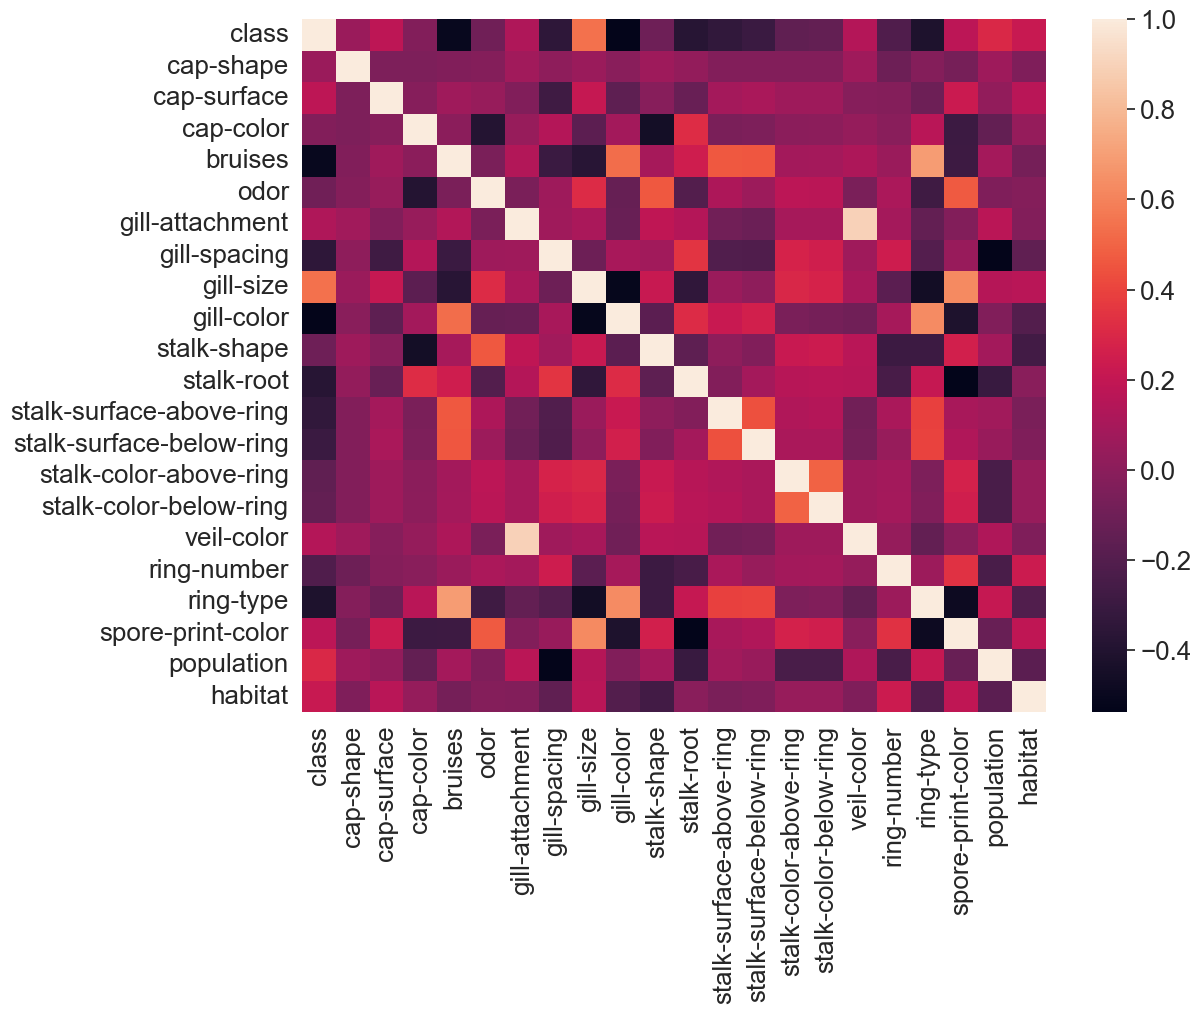

In [121]:
plt.figure(figsize=(12,9))
ax = sns.heatmap(mush.corr())

## Build histograms of the distribution of all parameters and their values 
## We can assume that the outliers will be in gill-attachment, gill-spacing, ring-number, veil-color

C:\Users\Никола\AppData\Local\Temp\ipykernel_18524\449554022.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  mush.hist(ax=fig.gca())


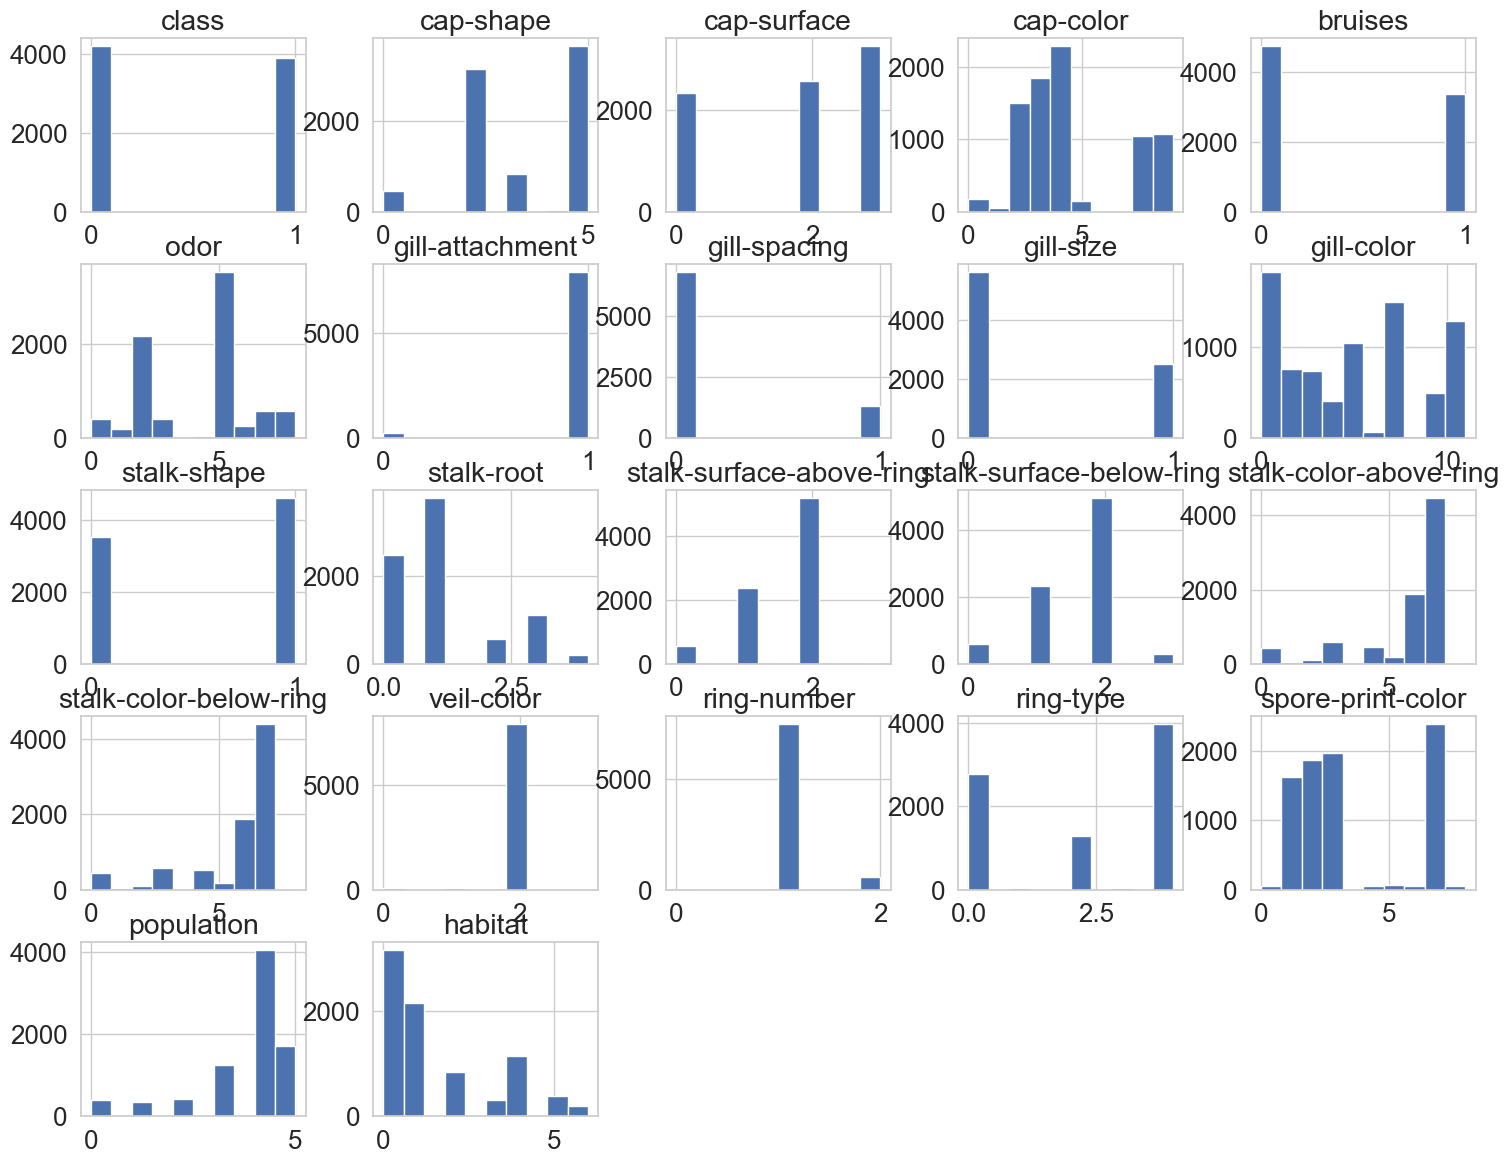

In [122]:
fig = plt.figure(figsize = (18,14))
mush.hist(ax=fig.gca())
plt.show()
fig.clear()
plt.close(fig)

## Hexplot of the dependence of the color of the mushroom cap and the color under the mushroom cap

<Axes: xlabel='gill-color', ylabel='cap-color'>

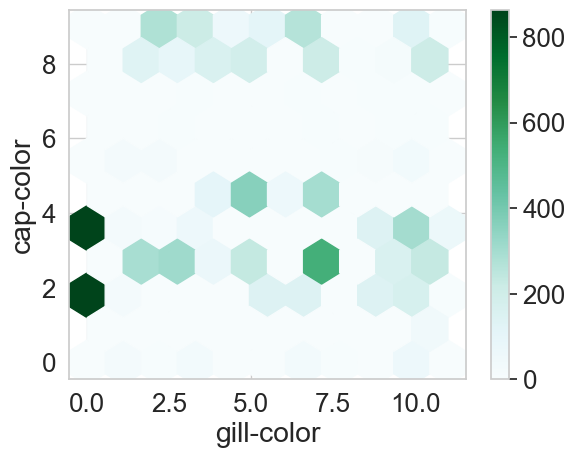

In [123]:
mush.plot.hexbin(x='gill-color', y='cap-color', gridsize=10)

## A line graph of the fungus habitat and its parameters 

<Axes: xlabel='habitat'>

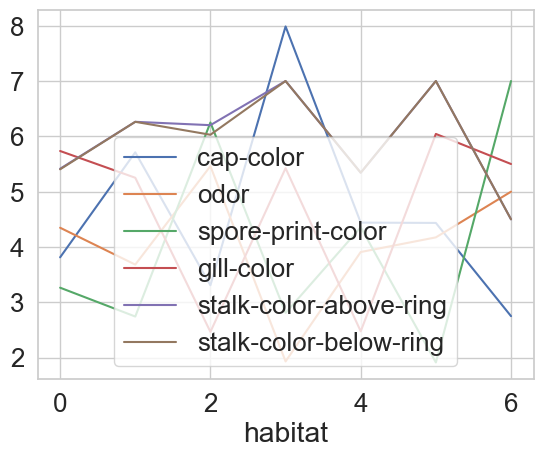

In [124]:
mush2 = mush.groupby('habitat').mean()[['cap-color', 'odor', 'spore-print-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring']]
mush2.plot.line()

# Use the built-in discribe() function to review the date set distribution

In [125]:
mush.describe(include = "all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Distribution visualization

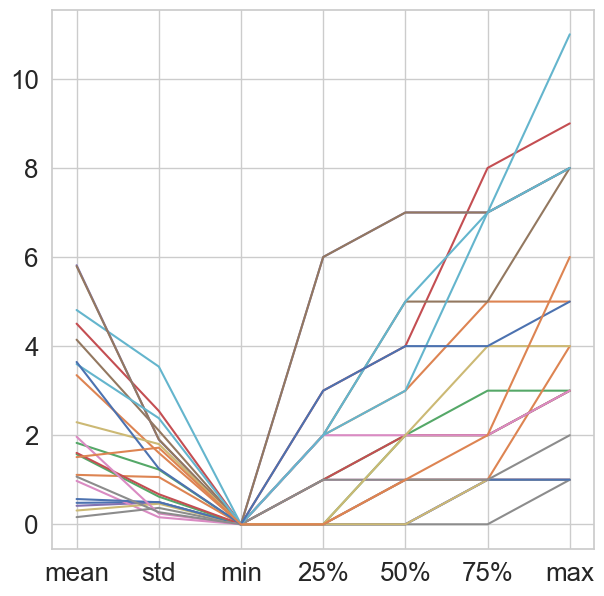

In [126]:
fig = plt.figure(figsize = (7,7))
describe_num_df = mush.describe()
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
k=1

for i in mush._get_numeric_data().columns:
  if i in ['index']:
    continue
  plt.plot("index", i, data=describe_num_df)
  k+=1

plt.show()
fig.clear()
plt.close(fig)

## Search for outliers 
## Creating a function to search for outliers so I don't have to manually search for them

In [127]:
def searchOut(mush):
   q1=mush.quantile(0.25)
   q3=mush.quantile(0.75)
   IQR=q3-q1
   outliers = mush[((mush<(q1-1.5*IQR)) | (mush>(q3+1.5*IQR)))]
   return outliers

## For each parameter, look for outliers

In [128]:
for i in mush._get_numeric_data().columns:
  if i in ['index']:
      continue
  outs = searchOut(mush[i])
  print("{1:<5} Outliers for {0}  ".format(i,len(outs)))

0     Outliers for class  
0     Outliers for cap-shape  
0     Outliers for cap-surface  
0     Outliers for cap-color  
0     Outliers for bruises  
0     Outliers for odor  
210   Outliers for gill-attachment  
1312  Outliers for gill-spacing  
0     Outliers for gill-size  
0     Outliers for gill-color  
0     Outliers for stalk-shape  
1312  Outliers for stalk-root  
0     Outliers for stalk-surface-above-ring  
0     Outliers for stalk-surface-below-ring  
1588  Outliers for stalk-color-above-ring  
1652  Outliers for stalk-color-below-ring  
200   Outliers for veil-color  
636   Outliers for ring-number  
0     Outliers for ring-type  
0     Outliers for spore-print-color  
724   Outliers for population  
192   Outliers for habitat  


## Outliers found -> output maximum and minimum Outliers

In [129]:
for i in mush._get_numeric_data().columns:
  if i in ['index']:
      continue
  outs = searchOut(mush[i])
  if len(outs)>0:
    print('Max Outlier: '+ str(outs.max()),"В ->",i)
    print('Min Outlier: '+ str(outs.min()),"В ->",i,'\n')

Max Outlier: 0 В -> gill-attachment
Min Outlier: 0 В -> gill-attachment 

Max Outlier: 1 В -> gill-spacing
Min Outlier: 1 В -> gill-spacing 

Max Outlier: 4 В -> stalk-root
Min Outlier: 3 В -> stalk-root 

Max Outlier: 4 В -> stalk-color-above-ring
Min Outlier: 0 В -> stalk-color-above-ring 

Max Outlier: 4 В -> stalk-color-below-ring
Min Outlier: 0 В -> stalk-color-below-ring 

Max Outlier: 3 В -> veil-color
Min Outlier: 0 В -> veil-color 

Max Outlier: 2 В -> ring-number
Min Outlier: 0 В -> ring-number 

Max Outlier: 1 В -> population
Min Outlier: 0 В -> population 

Max Outlier: 6 В -> habitat
Min Outlier: 6 В -> habitat 



# machine learning models:

## Let's prepare the data: find the parameters with the highest information gain
## This function calculates impurity of a feature. Supported impurity criteria: 'entropy', 'gini' input: feature (this needs to be a Pandas series) output: feature impurity
    

In [130]:
feats =['cap-shape',
'cap-surface',
'cap-color',
'bruises odor' ,
'gill-attachment' ,
'gill-spacing' ,
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring' ,
'stalk-color-above-ring' ,
'stalk-color-below-ring' ,
'veil-type' ,
'veil-color' ,
'ring-number' ,
'ring-type' ,
'spore-print-color' ,
'population' ,
'habitat']
featS=pd.Series(feats)

def compute_impurity(feature, impurity_criterion):
    
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


print('impurity using entropy:', compute_impurity(featS, 'entropy'))
print('impurity using gini index:', compute_impurity(featS, 'gini'))

impurity using entropy: 4.322
impurity using gini index: 0.95


## This function calculates information gain for splitting on a particular descriptive feature for a given dataset and a given impurity criteria. Supported split criterion: 'entropy', 'gini'


In [131]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
       
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [132]:
split_criterion = 'entropy'
for feature in mush.drop(columns='class').columns:
    feature_info_gain = comp_feature_information_gain(mush, 'class', feature, split_criterion)

target feature: class
descriptive_feature: cap-shape
split criterion: entropy
impurity of partitions: [0.997, 0.488, -0.0, 1.0, 0.849, -0.0]
weights of partitions: [0.45, 0.056, 0.004, 0.388, 0.102, 0.0]
remaining impurity: 0.950576
information gain: 0.04842400000000002
target feature: class
descriptive_feature: cap-surface
split criterion: entropy
impurity of partitions: [0.992, 0.996, 0.912, -0.0]
weights of partitions: [0.315, 0.399, 0.286, 0.0]
remaining impurity: 0.9707159999999999
information gain: 0.028284000000000087
target feature: class
descriptive_feature: cap-color
split criterion: entropy
impurity of partitions: [0.992, 0.953, 0.89, 0.989, 0.98, 0.964, 0.863, -0.0, 0.845, -0.0]
weights of partitions: [0.281, 0.132, 0.128, 0.226, 0.185, 0.018, 0.021, 0.002, 0.005, 0.002]
remaining impurity: 0.9629820000000001
information gain: 0.03601799999999988
target feature: class
descriptive_feature: bruises
split criterion: entropy
impurity of partitions: [0.691, 0.889]
weights of par

In [133]:
split_criteria = 'gini'
for feature in mush.drop(columns='class').columns:
    feature_info_gain = comp_feature_information_gain(mush, 'class', feature, split_criteria)

target feature: class
descriptive_feature: cap-shape
split criterion: gini
impurity of partitions: [0.498, 0.19, 0.0, 0.5, 0.399, 0.0]
weights of partitions: [0.45, 0.056, 0.004, 0.388, 0.102, 0.0]
remaining impurity: 0.469438
information gain: 0.029561999999999977
target feature: class
descriptive_feature: cap-surface
split criterion: gini
impurity of partitions: [0.495, 0.497, 0.441, 0.0]
weights of partitions: [0.315, 0.399, 0.286, 0.0]
remaining impurity: 0.48035399999999995
information gain: 0.01864600000000005
target feature: class
descriptive_feature: cap-color
split criterion: gini
impurity of partitions: [0.494, 0.468, 0.426, 0.493, 0.486, 0.475, 0.408, 0.0, 0.397, 0.0]
weights of partitions: [0.281, 0.132, 0.128, 0.226, 0.185, 0.018, 0.021, 0.002, 0.005, 0.002]
remaining impurity: 0.475549
information gain: 0.023451
target feature: class
descriptive_feature: bruises
split criterion: gini
impurity of partitions: [0.301, 0.425]
weights of partitions: [0.416, 0.584]
remaining im

# Data preprocessing

## Cross-validation is a resampling procedure used to evaluate machine learning models on a limited sample of data.

## The procedure has one parameter, called k, which refers to the number of groups into which a given data sample should be divided. Thus, the procedure is often referred to as k-fold cross-validation (cross-validation).
## When a particular value for k is chosen, it can be used instead of k in the model reference, e.g., when k=10, becomes 10-fold cross-validation.

In [134]:
skf = StratifiedKFold(n_splits=4)
X = mush.filter(['bruises','odor','gill-color','population','ring-type'])
y = mush['class']
skf.get_n_splits(X, y)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Fold 0:
  Train: index=[1176 1177 1178 ... 8121 8122 8123]
  Test:  index=[   0    1    2 ... 4349 4350 4351]
Fold 1:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[1176 1177 1178 ... 5496 5498 5499]
Fold 2:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[2361 2362 2363 ... 6640 6641 6642]
Fold 3:
  Train: index=[   0    1    2 ... 6640 6641 6642]
  Test:  index=[3693 3695 3696 ... 8121 8122 8123]


## Decision Trees (DT) are a non-parametric supervised learning method used for classification and regression.
## DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
## We use the DecisionTreeClassifier model with the Gini criterion.

Train time DTC gini: 0.027925968170166016


[Text(0.5, 0.875, 'x[1] <= 2.5\ngini = 0.499\nsamples = 6093\nvalue = [3156, 2937]'),
 Text(0.25, 0.625, 'x[1] <= 0.5\ngini = 0.274\nsamples = 2439\nvalue = [400, 2039]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 400\nvalue = [400, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 2039\nvalue = [0, 2039]'),
 Text(0.75, 0.625, 'x[1] <= 5.5\ngini = 0.371\nsamples = 3654\nvalue = [2756, 898]'),
 Text(0.625, 0.375, 'x[2] <= 9.5\ngini = 0.076\nsamples = 2869\nvalue = [2756, 113]'),
 Text(0.5, 0.125, 'gini = 0.04\nsamples = 2327\nvalue = [2279, 48]'),
 Text(0.75, 0.125, 'gini = 0.211\nsamples = 542\nvalue = [477, 65]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 785\nvalue = [0, 785]')]

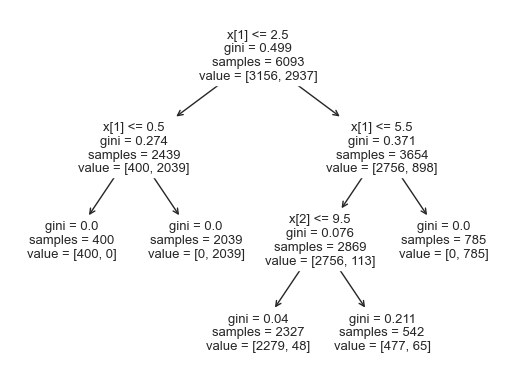

In [135]:
lst_accu_stratified = []
start_time = time.time()
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    gini.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(gini.score(X_test_fold, y_test_fold))
    y_pred_gini = gini.predict(X_test_fold)
    
end_time = time.time()
t1 = end_time - start_time
print('Train time DTC gini:',t1)
tree.plot_tree(gini.fit(X_train_fold, y_train_fold))

## Model accuracy using gini criteria 

In [136]:
print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',np.mean(lst_accu_stratified))
print("Recall:",recall_score(y_test_fold, y_pred_gini))

Maximum Accuracy 0.9788281634662728
Minimum Accuracy: 0.6656819300837026
Overall Accuracy: 0.8974643032988676
Recall: 0.9560776302349336


## Using the same model but with the entropy criteria

In [137]:
skf = StratifiedKFold(n_splits=4)
X = mush.filter(['bruises','odor','gill-color','population','ring-type'])
y = mush['class']
skf.get_n_splits(X, y)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Fold 0:
  Train: index=[1176 1177 1178 ... 8121 8122 8123]
  Test:  index=[   0    1    2 ... 4349 4350 4351]
Fold 1:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[1176 1177 1178 ... 5496 5498 5499]
Fold 2:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[2361 2362 2363 ... 6640 6641 6642]
Fold 3:
  Train: index=[   0    1    2 ... 6640 6641 6642]
  Test:  index=[3693 3695 3696 ... 8121 8122 8123]


Train time DTC entropy: 0.02622532844543457


[Text(0.5, 0.875, 'x[1] <= 2.5\nentropy = 0.999\nsamples = 6093\nvalue = [3156, 2937]'),
 Text(0.25, 0.625, 'x[1] <= 0.5\nentropy = 0.644\nsamples = 2439\nvalue = [400, 2039]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 400\nvalue = [400, 0]'),
 Text(0.375, 0.375, 'entropy = 0.0\nsamples = 2039\nvalue = [0, 2039]'),
 Text(0.75, 0.625, 'x[1] <= 5.5\nentropy = 0.804\nsamples = 3654\nvalue = [2756, 898]'),
 Text(0.625, 0.375, 'x[2] <= 7.5\nentropy = 0.239\nsamples = 2869\nvalue = [2756, 113]'),
 Text(0.5, 0.125, 'entropy = 0.096\nsamples = 1935\nvalue = [1911, 24]'),
 Text(0.75, 0.125, 'entropy = 0.454\nsamples = 934\nvalue = [845, 89]'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 785\nvalue = [0, 785]')]

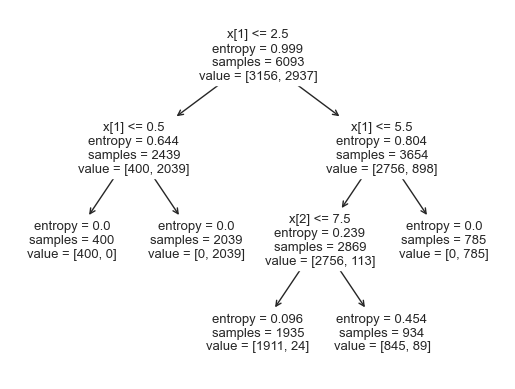

In [138]:
lst_accu_stratified2 = []
start_time = time.time()
entr = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    entr.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified2.append(entr.score(X_test_fold, y_test_fold))
    y_pred_entr = entr.predict(X_test_fold)
end_time = time.time()
t2 = end_time - start_time
print('Train time DTC entropy:',t2)
tree.plot_tree(entr.fit(X_train_fold, y_train_fold))

## Model accuracy for entropy

In [139]:
print('Maximum Accuracy',max(lst_accu_stratified2)) 
print('Minimum Accuracy:',min(lst_accu_stratified2)) 
print('Overall Accuracy:',np.mean(lst_accu_stratified2))
print("Recall:",recall_score(y_test_fold, y_pred_entr))

Maximum Accuracy 0.9788281634662728
Minimum Accuracy: 0.8729689807976366
Overall Accuracy: 0.949286065977351
Recall: 0.9560776302349336


# Next model
## data preprocessing:

In [140]:
skf.get_n_splits(X, y)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Fold 0:
  Train: index=[1176 1177 1178 ... 8121 8122 8123]
  Test:  index=[   0    1    2 ... 4349 4350 4351]
Fold 1:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[1176 1177 1178 ... 5496 5498 5499]
Fold 2:
  Train: index=[   0    1    2 ... 8121 8122 8123]
  Test:  index=[2361 2362 2363 ... 6640 6641 6642]
Fold 3:
  Train: index=[   0    1    2 ... 6640 6641 6642]
  Test:  index=[3693 3695 3696 ... 8121 8122 8123]


## Random Forest is a machine learning algorithm used for classification and regression tasks. It is an extension of the decision tree algorithm, utilizing an ensemble of trees to improve the quality of classification or regression.

In [141]:
lst_accu_stratified3 = []
start_time = time.time()
RFC = RandomForestClassifier(max_depth=3, random_state=1)
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    RFC.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified3.append(entr.score(X_test_fold, y_test_fold))
    y_pred = entr.predict(X_test_fold)
end_time = time.time()
t3 = end_time - start_time
print('Train time RFC :',t3)

Train time RFC : 0.7639596462249756


## Parameter importancy

,Features,Gini-Importance
0,odor,0.463050
1,gill-color,0.181106
2,population,0.163921
3,bruises,0.133657
4,ring-type,0.058265


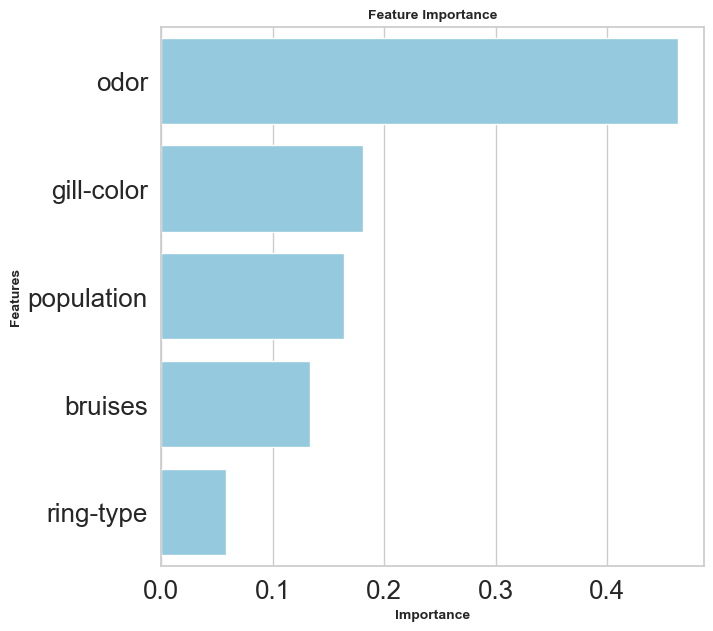

In [142]:
feats = {}
for feature, importance in zip(X.columns, RFC.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=10, weight = 'bold')
plt.ylabel('Features', fontsize=10, weight = 'bold')
plt.title('Feature Importance', fontsize=10, weight = 'bold')
importances

## Partial Dependence Plot (PDP).

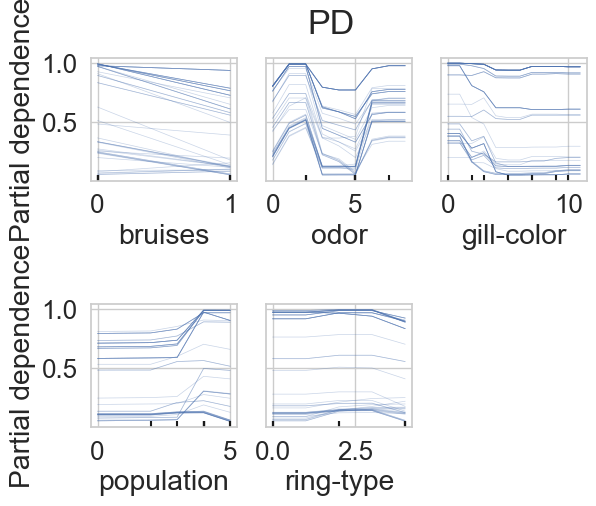

In [143]:
features = [ 'bruises','odor','gill-color','population','ring-type' ] 
display = PartialDependenceDisplay.from_estimator(
    RFC,
    X,
    features,
    kind="individual",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=1,
)
display.figure_.suptitle('PD')
display.figure_.subplots_adjust(hspace=1)

## Accuracy of the RFC model

In [144]:
print('Maximum Accuracy',max(lst_accu_stratified3)) 
print('Minimum Accuracy:',min(lst_accu_stratified3)) 
print('Overall Accuracy:',np.mean(lst_accu_stratified3))
print("Recall:",recall_score(y_test_fold, y_pred))

Maximum Accuracy 0.999015263417036
Minimum Accuracy: 0.9709502708025604
Overall Accuracy: 0.9807976366322009
Recall: 0.9560776302349336


## The Support Vector Machine (SVM) method is a set of supervised learning techniques used for classification, regression, and outlier detection.

In [145]:
lst_accu_stratified4 = []
start_time = time.time()
SVC1 = SVC(kernel = 'rbf', random_state=1)
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    SVC1.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified4.append(entr.score(X_test_fold, y_test_fold))
    y_pred = entr.predict(X_test_fold)
end_time = time.time()
t4 = end_time - start_time
print('Train time SVC :',t4)

Train time SVC : 1.4541130065917969


## Partial Dependence Plot (PDP).

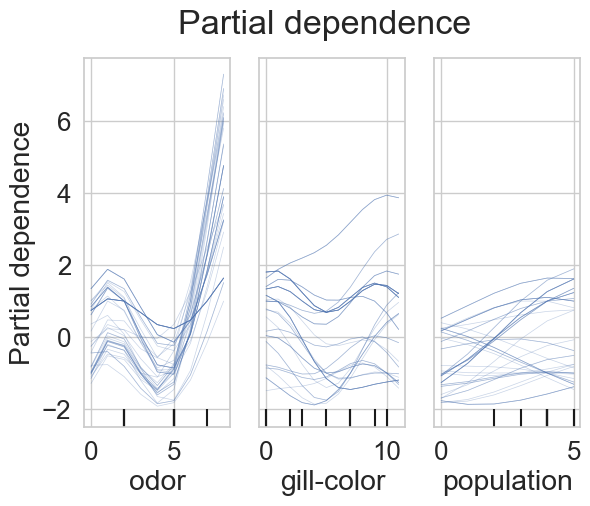

In [146]:
features = [ 'odor','gill-color','population'] 
display = PartialDependenceDisplay.from_estimator(
    SVC1,
    X,
    features,
    kind="individual",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=1,
)
display.figure_.suptitle(
    "Partial dependence"
)
display.figure_.subplots_adjust(hspace=1)

## Evaluate accuracy

In [147]:
print('Maximum Accuracy',max(lst_accu_stratified4)) 
print('Minimum Accuracy:',min(lst_accu_stratified4)) 
print('Overall Accuracy:',np.mean(lst_accu_stratified4))
print("Recall:",recall_score(y_test_fold, y_pred))

Maximum Accuracy 0.999015263417036
Minimum Accuracy: 0.9709502708025604
Overall Accuracy: 0.9807976366322009
Recall: 0.9560776302349336


## Compare train time

In [148]:
print('DTC gini   ',t1.__round__(4))
print('DTC entropy',t2.__round__(4))
print('RF         ',t3.__round__(4))
print('SVC        ',t4.__round__(4))

DTC gini    0.0279
DTC entropy 0.0262
RF          0.764
SVC         1.4541
